In [1]:
import pandas as pd

In [11]:
df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
df_nobel = pd.read_csv("data/out/nobel_laureates.csv")

merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")

# merged_df.fillna(0, inplace=True)
merged_df



,COUNTRYCODE,YEAR,TERTIARYCOMPLETIONRATE,EDUCATIONGDPSHARE,NOBELLAUREATES
0,AFG,1870,0.000000,NaN,NaN
1,AFR,1870,0.000000,NaN,NaN
2,ALB,1870,0.000000,NaN,NaN
3,AMN,1870,0.607575,NaN,NaN
4,AMS,1870,0.027565,NaN,NaN
...,...,...,...,...,...
9422,VNM,2040,19.100000,NaN,NaN
9423,YEM,2040,18.700000,NaN,NaN
9424,ZAF,2040,16.500000,NaN,NaN
9425,ZMB,2040,2.200000,NaN,NaN


In [3]:
print(df_tertiary.columns)
print(df_gpd_edu.columns)
print(df_nobel.columns)

Index(['COUNTRYCODE', 'YEAR', 'TERTIARYCOMPLETIONRATE'], dtype='object')
Index(['COUNTRYCODE', 'YEAR', 'EDUCATIONGDPSHARE'], dtype='object')
Index(['YEAR', 'COUNTRYCODE', 'NOBELLAUREATES'], dtype='object')


In [4]:
df_nobel

,YEAR,COUNTRYCODE,NOBELLAUREATES
0,1901,NLD,1
1,1901,DEU,2
2,1901,DEU,2
3,1902,DEU,1
4,1902,NLD,2
...,...,...,...
642,2023,HUN,2
643,2023,HUN,2
644,2024,USA,3
645,2024,USA,3


USA
GBR
RUS


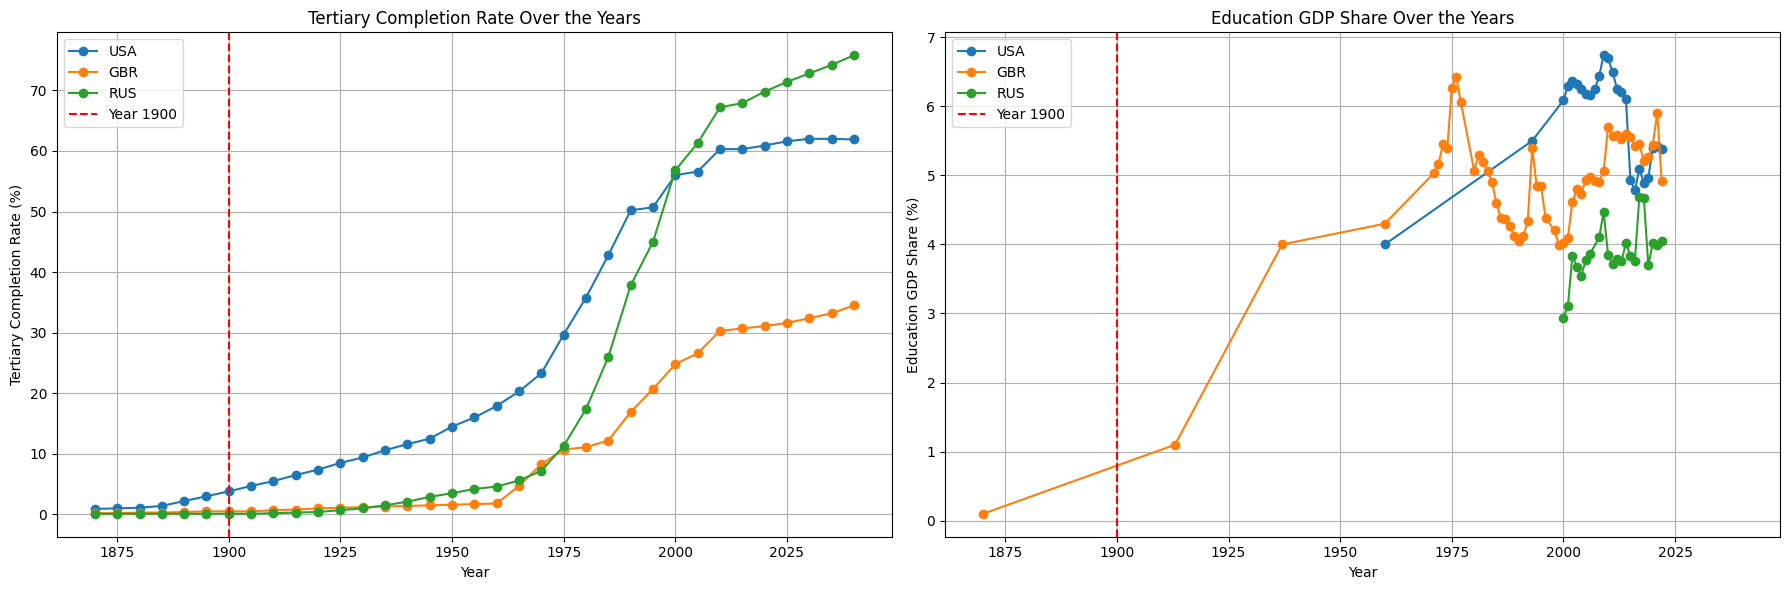

In [ ]:
import matplotlib.pyplot as plt

SELECTED_COUNTRIES = ["USA", "GBR", "RUS"]
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# Plot tertiary completion rate
for country in SELECTED_COUNTRIES:
    print(country)
    country_df = df_tertiary[df_tertiary["COUNTRYCODE"] == country]
    axes[0].plot(
        country_df["YEAR"],
        country_df["TERTIARYCOMPLETIONRATE"],
        marker="o",
        label=country,
    )
axes[0].axvline(x=1900, color='red', linestyle='--', label='Year 1900')
axes[0].set_title("Tertiary Completion Rate Over the Years")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Tertiary Completion Rate (%)")
axes[0].legend()
axes[0].grid(True)

# Plot education GDP share
for country in SELECTED_COUNTRIES:
    country_gdp_df = df_gpd_edu[df_gpd_edu["COUNTRYCODE"] == country]
    axes[1].plot(
        country_gdp_df["YEAR"],
        country_gdp_df["EDUCATIONGDPSHARE"],
        marker="o",
        label=country,
    )
axes[1].axvline(x=1900, color='red', linestyle='--', label='Year 1900')
axes[1].set_title("Education GDP Share Over the Years")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Education GDP Share (%)")
axes[1].legend()
axes[1].grid(True)

# # Plot education GDP share
# for country in SELECTED_COUNTRIES:
#     country_nobel_df = df_nobel[df_nobel["COUNTRYCODE"] == country]
#     axes[1].plot(
#         country_nobel_df["YEAR"],
#         country_nobel_df["NOBELLAUREATES"],
#         marker="o",
#         label=country,
#     )
# axes[1].set_title("Education GDP Share Over the Years")
# axes[1].set_xlabel("Year")
# axes[1].set_ylabel("Education GDP Share (%)")
# axes[1].legend()
# axes[1].grid(True)


plt.tight_layout()
plt.show()
